# Logic design


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### original func

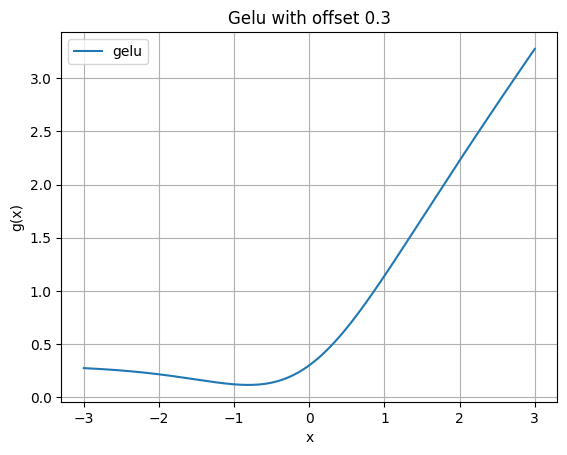

In [2]:
# Redefine the original g(x) function
def gelu(x):
    return 0.5 * x * (1 + np.tanh((2/np.pi)**0.5 * (x + 0.0455399241))) + 0.3  #offset = 0.3

# Generate x values
x_values = np.linspace(-3, 3, 400)
# Calculate y values using the function g(x)
y_values = gelu(x_values)

# Plot the function
plt.plot(x_values, y_values, label='gelu')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Gelu with offset 0.3')
plt.grid(True)
plt.legend()
plt.show()

### Polynomial fitting

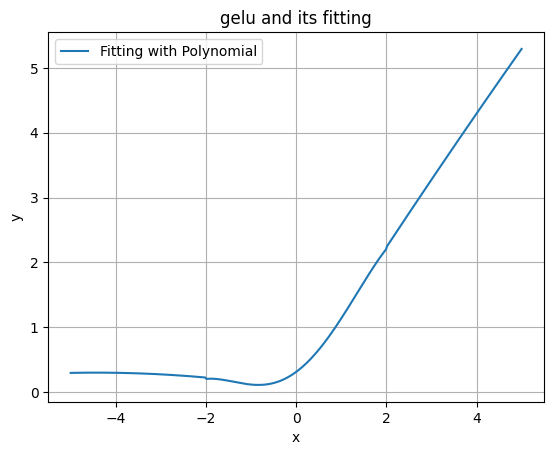

In [3]:
# Define the piecewise function
def gelu_fitting(x):
    if 2 <= x <= 5:
        return -0.0112 * x**2 + 1.099 * x + 0.0783
    elif -2 <= x <= 2:
        return -0.0303 * x**4 - 0.0029 * x**3 + 0.3449 * x**2 + 0.5131 * x + 0.3089
    elif  -5<= x <= -2:
        return -0.01282 * x**2 - 0.1138 * x + 0.04508
    elif x>5:
        return x
    else:
        return 0.3

    
# Define the original g(x) function
def g(x):
    return 0.5 * x * (1 + np.tanh((2/np.pi)**0.5 * (x + 0.0455399241))) + 0.3  #offset = 0.3

# Generate x values
x_values = np.linspace(-5, 5, 400)

# Calculate y values for both functions
y_values_piecewise = np.array([gelu_fitting(x) for x in x_values])
y_values_g = g(x_values)

# Plot both functions
plt.plot(x_values, y_values_piecewise, label='Fitting with Polynomial')
# plt.plot(x_values, y_values_g, label='gelu')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gelu and its fitting')
plt.grid(True)
plt.legend()
plt.show()



### fitting difference

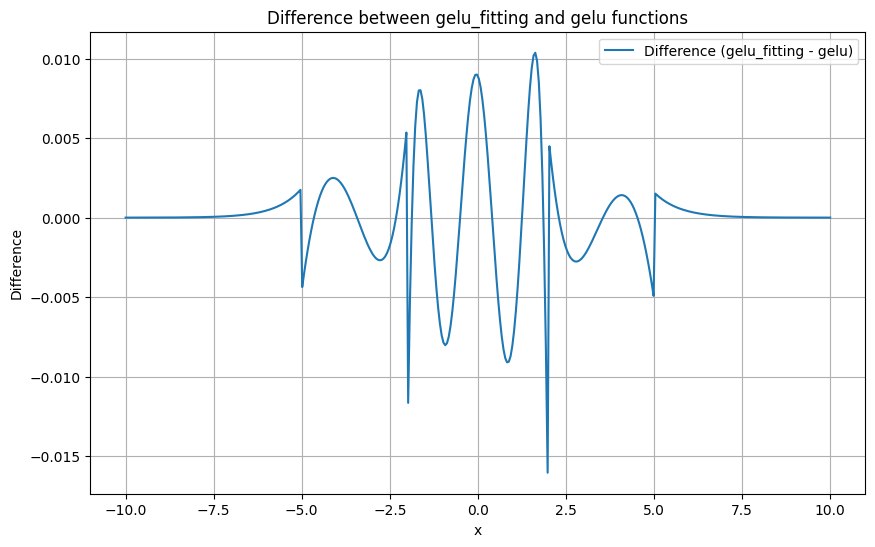

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gelu_fitting function
def gelu_fitting(x):
    if 2 <= x <= 5:
        return -0.0112 * x**2 + 1.099 * x + 0.0783
    elif -2 <= x <= 2:
        return -0.0303 * x**4 - 0.0029 * x**3 + 0.3449 * x**2 + 0.5131 * x + 0.3089
    elif  -5<= x <= -2:
        return -0.01282 * x**2 - 0.1138 * x + 0.04508
    elif x>5:
        return x +0.3
    else:
        return 0.3

# Define the gelu function
def gelu(x):
    return 0.5 * x * (1 + np.tanh((2/np.pi)**0.5 * (x + 0.0455399241))) + 0.3

# Define a range for x
x_values = np.linspace(-10, 10, 400)
# Compute the difference between gelu_fitting and gelu for the range of x
diff = [gelu_fitting(x) - gelu(x) for x in x_values]

# Plot the difference
plt.figure(figsize=[10,6])
plt.plot(x_values, diff, label='Difference (gelu_fitting - gelu)')
plt.title('Difference between gelu_fitting and gelu functions')
plt.xlabel('x')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()


### verilog validation

In [5]:
# Convert the Verilog module to Python and plot the function

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the Python version of the Verilog gelu module
def gelu_v(in_val):
    # Constants from the Verilog code
    a1, a2, a3 = 112, 10990, 783
    b1, b2, b3, b4, b5 = 303, 29, 3449, 5131, 3089
    c1, c2, c3 = 128, 1138, 451
    
    in_val = round(in_val,4)
    in_val = in_val*10000
    # Variable for the output
    d_out = 0

    # Translating the Verilog logic into Python
    if -20000 <= in_val <= 20000:
        y1 = b1 * (in_val // 100)*(in_val // 100)*(in_val // 1000)*(in_val // 1000) // 1000000
        y2 = b2 * (in_val // 10)*(in_val // 100)*(in_val // 100) // 10000000
        y3 = b3 * (in_val // 10)*(in_val // 10) // 1000000
        y4 = b4 * in_val // 10000
        y5 = b5
        d_out = y3 + y4 + y5 - y1 - y2
    elif 20000 < in_val <= 55000:
        y3 = (a1 * (in_val // 10)**2) // 1000000
        y4 = a2 * in_val // 10000
        y5 = a3
        d_out = y4 + y5 - y3
    elif -55000 <= in_val < -20000:
        y3 = c1 * (in_val // 10)**2 // 1000000
        y4 = c2 * in_val // 10000
        y5 = c3
        d_out = y5 - y4 - y3
    elif in_val > 55000:
        d_out = in_val + 3000
    else:  # in_val < -55000
        d_out = 3000

    return d_out/10000

# # Define a range for in_val
# in_values = np.linspace(-60000, 60000, 1200)
# # Compute the gelu function for the range of in_val
# out_values = [gelu_v(x) for x in in_values]
# 
# # Plotting
# plt.figure(figsize=[10,6])
# plt.plot(in_values, out_values, label='GELU Python')
# plt.title('Python Translation of Verilog GELU Function')
# plt.xlabel('Input Value')
# plt.ylabel('Output Value')
# plt.grid(True)
# plt.legend()
# plt.show()



test = -5
for i in range(60):
    print("test = ",test , "Gelu_v = ",gelu_v(test),"Gelu = ",gelu_fitting(test))
    test += 0.2


test =  -5 Gelu_v =  0.2941 Gelu =  0.29357999999999995
test =  -4.8 Gelu_v =  0.2965 Gelu =  0.29594719999999997
test =  -4.6 Gelu_v =  0.2978 Gelu =  0.2972888
test =  -4.3999999999999995 Gelu_v =  0.2981 Gelu =  0.2976048
test =  -4.199999999999999 Gelu_v =  0.2974 Gelu =  0.29689519999999997
test =  -3.999999999999999 Gelu_v =  0.2955 Gelu =  0.29516
test =  -3.799999999999999 Gelu_v =  0.2928 Gelu =  0.29239919999999997
test =  -3.5999999999999988 Gelu_v =  0.289 Gelu =  0.2886128
test =  -3.3999999999999986 Gelu_v =  0.2842 Gelu =  0.28380079999999996
test =  -3.1999999999999984 Gelu_v =  0.2783 Gelu =  0.27796319999999997
test =  -2.9999999999999982 Gelu_v =  0.2713 Gelu =  0.27109999999999995
test =  -2.799999999999998 Gelu_v =  0.2635 Gelu =  0.2632111999999999
test =  -2.599999999999998 Gelu_v =  0.2545 Gelu =  0.2542967999999999
test =  -2.3999999999999977 Gelu_v =  0.2446 Gelu =  0.2443567999999999
test =  -2.1999999999999975 Gelu_v =  0.2336 Gelu =  0.23339119999999985
tes

In [6]:
# Generate input values
x_values = np.linspace(-5, 5, 1000)

# Evaluate both functions
original_values = np.array([gelu(x) for x in x_values])
verilog_values = np.array([gelu_v(x) for x in x_values])

# Compute MSE
mse = np.mean((original_values - verilog_values) ** 2)

print(mse)

6.771027657464238e-05


# LUT

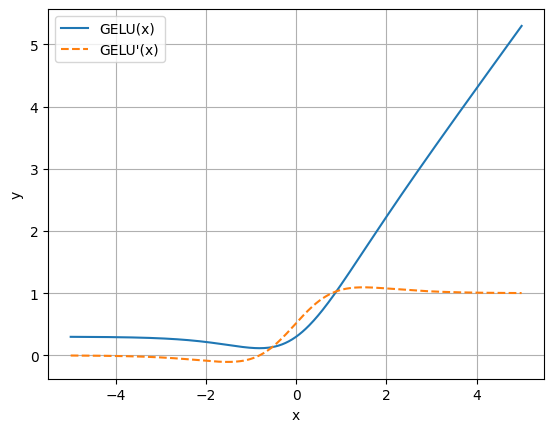

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gelu(x):
    return 0.5 * x * (1 + np.tanh((2/np.pi)**0.5 * (x + 0.0455399241))) + 0.3  # offset = 0.3

def gelu_derivative(x):
    return 0.707106781186548 * (np.pi ** -0.5) * x * (1 - np.tanh(1.4142135623731 * (np.pi ** -0.5) * (x + 0.0455399241)) ** 2) + 0.5 * np.tanh(1.4142135623731 * (np.pi ** -0.5) * (x + 0.0455399241)) + 0.5

# Generate x values
x_values = np.linspace(-5, 5, 400)

# Calculate y values for gelu(x) and its derivative
y_values_gelu = gelu(x_values)
y_values_derivative = gelu_derivative(x_values)

# Plot gelu(x) and its derivative
plt.plot(x_values, y_values_gelu, label='GELU(x)')
plt.plot(x_values, y_values_derivative, label="GELU'(x)", linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig(r'C:\Users\18681\Desktop\5003report\GELU.png')

误差: 4.0320961480999137e-11


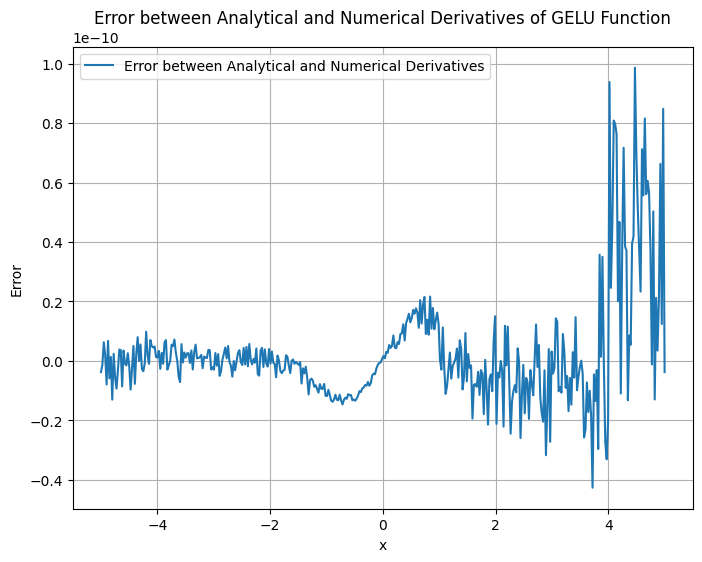

In [35]:
# Define a numerical derivative function using central differences
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Original GELU function for numerical derivative
def gelu_func(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.0455399241))) + 0.3

# Compute the numerical derivative values
y_num_derivatives = np.array([numerical_derivative(gelu_func, x_val) for x_val in x_values])

# Compute the error between analytical and numerical derivatives
error_values = y_values_derivative - y_num_derivatives





# Plot the error
plt.figure(figsize=[8, 6])
plt.plot(x_values, error_values, label='Error between Analytical and Numerical Derivatives')
plt.title('Error between Analytical and Numerical Derivatives of GELU Function')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
def gradient_step(values):
    gradient = np.abs(gelu_derivative(values))
    if 0<= gradient < 0.05:
        return 0.06
    elif 0.05 <= gradient < 0.1:
        return 0.05
    elif 0.1 <= gradient < 0.2:
        return 0.04
    elif 0.2 <= gradient < 0.4:
        return 0.03
    elif 0.4 <= gradient < 0.6:
        return 0.02
    elif 0.6 <= gradient < 0.8:
        return 0.02
    elif 0.8 <= gradient < 1.0:
        return 0.01
    else:
        return 0.01
    
initial_values = -4
Stepping_Values = []
for i in range(256):
    Stepping_Values.append(initial_values)
    initial_values += gradient_step(initial_values)

print(Stepping_Values[-1])
# for i in Stepping_Values:
#     print(i)

1.9000000000000017


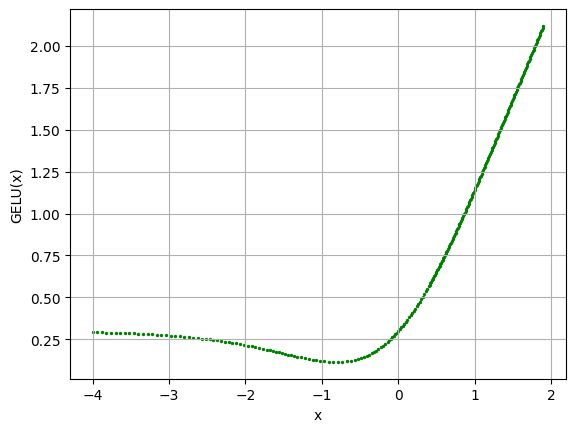

In [10]:
# Initialize the initial value and step values list
initial_values = -4
Stepping_Values = []

# Generate the stepping values
for i in range(256):
    Stepping_Values.append(initial_values)
    initial_values += gradient_step(initial_values)

# Calculate the GELU values for the stepping values
GELU_Values = [gelu(x) for x in Stepping_Values]

# Plotting the scatter plot
plt.scatter(Stepping_Values, GELU_Values, color='g',s=2)
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.grid(True)
plt.show()


In [38]:
# Define the function to find the number in list A that is closest to B in absolute value
def closest_number(A, B):
    return min(A, key=lambda x: abs(x - B))

# Test the function with a sample list and number

closest = closest_number(Stepping_Values, 1.22)
print(closest)

1.220000000000001


In [48]:

# Generate x values
x_values = np.linspace(-4, 1.9, 1000)

# Calculate y values for gelu(x) and its derivative
y_values_gelu = gelu(x_values)
y_LUT_values = []

for x in x_values:
    if x>5:
        y_LUT_values.append(x+0.3)
    elif x<-5:
        y_LUT_values.append(0.3)
    else:
        x_closest = closest_number(Stepping_Values, x)
        y_LUT_values.append(gelu(x_closest))


y_LUT_values = np.array(y_LUT_values)
y_values_gelu = np.array(y_values_gelu)

mse = np.mean((y_LUT_values - y_values_gelu) ** 2)

print(mse)

4.370817802169266e-06


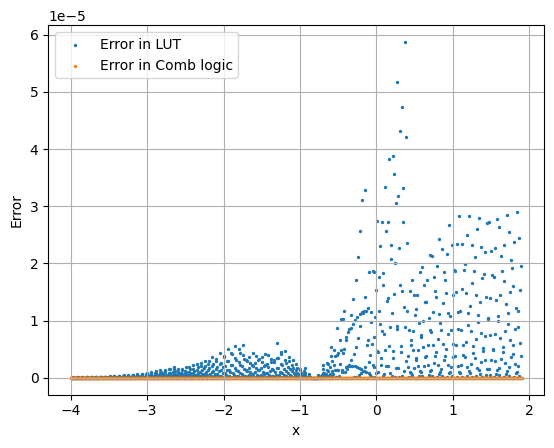

In [65]:
LUT_errors = np.array(y_LUT_values) - np.array(y_values_gelu)

LUT_errors = LUT_errors**2


def floating_to_fixed_point_error(array):
    fixed_point_repr = np.round(array * (2**16)) / (2**16)
    error = array - fixed_point_repr
    return error**2


Comb_errors = floating_to_fixed_point_error(x_values)


# 绘制误差图
# Plot the error
plt.scatter(x_values, LUT_errors, label='Error in LUT',s=2)
plt.scatter(x_values, Comb_errors, label='Error in Comb logic',s=2)
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
# avg stepping
avg_x_values = np.linspace(-5, 5, 256)
avg_y_values_gelu = gelu(x_values)


# Generate x values
x_values = np.linspace(-5, 5, 1000)
# Calculate y values for gelu(x) and its derivative
y_values_gelu = gelu(x_values)

y_test_values = []
for x in x_values:
    x_closest = closest_number(avg_x_values, x)
    y_test_values.append(gelu(x_closest))
    
    
y_test_values = np.array(y_test_values)
y_values_gelu = np.array(y_values_gelu)

mse = np.mean((y_test_values - y_values_gelu) ** 2)

print(mse)

6.569786678521192e-05


In [42]:
def decimal_to_fixed_point_binary_twos_complement(value):
    # 检查是否为负数
    is_negative = value < 0
    
    # 分离整数部分和小数部分
    integer_part, fractional_part = divmod(abs(value), 1)
    integer_part = int(integer_part)
    
    # 转换整数部分为二进制，并确保长度为16位
    integer_binary = bin(integer_part).replace('0b', '').rjust(16, '0')[:16]
    
    # 转换小数部分为二进制
    fractional_binary = ''
    for _ in range(16):
        fractional_part *= 2
        bit, fractional_part = divmod(fractional_part, 1)
        fractional_binary += str(int(bit))
    
    # 如果是正数，直接组合整数和小数部分
    if not is_negative:
        fixed_point_binary = integer_binary + fractional_binary
    else:
        # 对正数的二进制表示取反加一以获取补码
        combined_binary = integer_binary + fractional_binary
        inverted_binary = ''.join('1' if bit == '0' else '0' for bit in combined_binary)
        fixed_point_binary = bin(int(inverted_binary, 2) + 1)[2:].zfill(32)
    
    return fixed_point_binary

# 示例
positive_value = 1

print(decimal_to_fixed_point_binary_twos_complement(positive_value))

print(gelu_fitting(positive_value))


00000000000000010000000000000000
1.1337


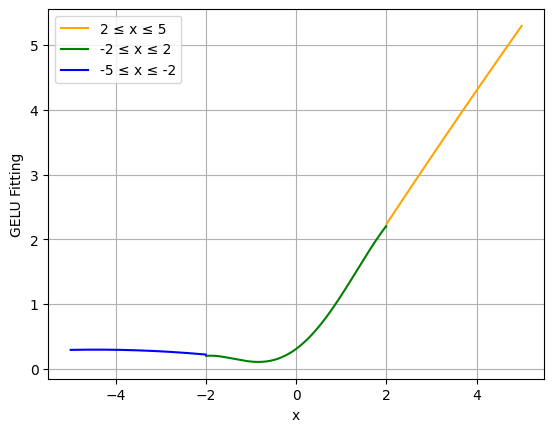

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def gelu_fitting(x):
    if 2 <= x <= 5:
        return -0.0112 * x**2 + 1.099 * x + 0.0783
    elif -2 <= x <= 2:
        return -0.0303 * x**4 - 0.0029 * x**3 + 0.3449 * x**2 + 0.5131 * x + 0.3089
    elif -5 <= x <= -2:
        return -0.01282 * x**2 - 0.1138 * x + 0.04508
    elif x > 5:
        return x
    else:
        return 0.3

# Generate a range of x values
x_range = np.linspace(-5, 5, 1000)

# Vectorize the function so it can accept NumPy arrays
vectorized_gelu = np.vectorize(gelu_fitting)

# Calculate y values
y_range = vectorized_gelu(x_range)

# Plot the function for different intervals
plt.plot(x_range[(x_range >= 2) & (x_range <= 5)], y_range[(x_range >= 2) & (x_range <= 5)], color='orange', label='2 ≤ x ≤ 5')
plt.plot(x_range[(x_range >= -2) & (x_range <= 2)], y_range[(x_range >= -2) & (x_range <= 2)], color='green', label='-2 ≤ x ≤ 2')
plt.plot(x_range[(x_range >= -5) & (x_range <= -2)], y_range[(x_range >= -5) & (x_range <= -2)], color='blue', label='-5 ≤ x ≤ -2')


# Adding labels and legend
plt.xlabel('x')
plt.ylabel('GELU Fitting')
plt.legend()
plt.grid(True)
plt.show()
